#Import librarys for the DATASET.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Load the dataset

In [ ]:
df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

##**Remarks**##

Step 1:
**Load the Dataset**
The first step in the machine learning pipeline is to load the dataset. This is done using the Pandas library, which allows us to read structured data from a CSV file. Once the dataset is loaded, we inspect its structure using the df.head() function to check the first few rows. This helps us understand the column names, data types, and any potential inconsistencies in the dataset.



# 2. Data Visualization & Preprocessing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


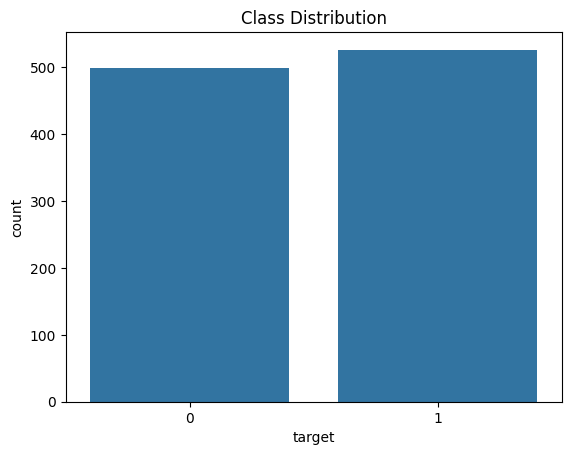

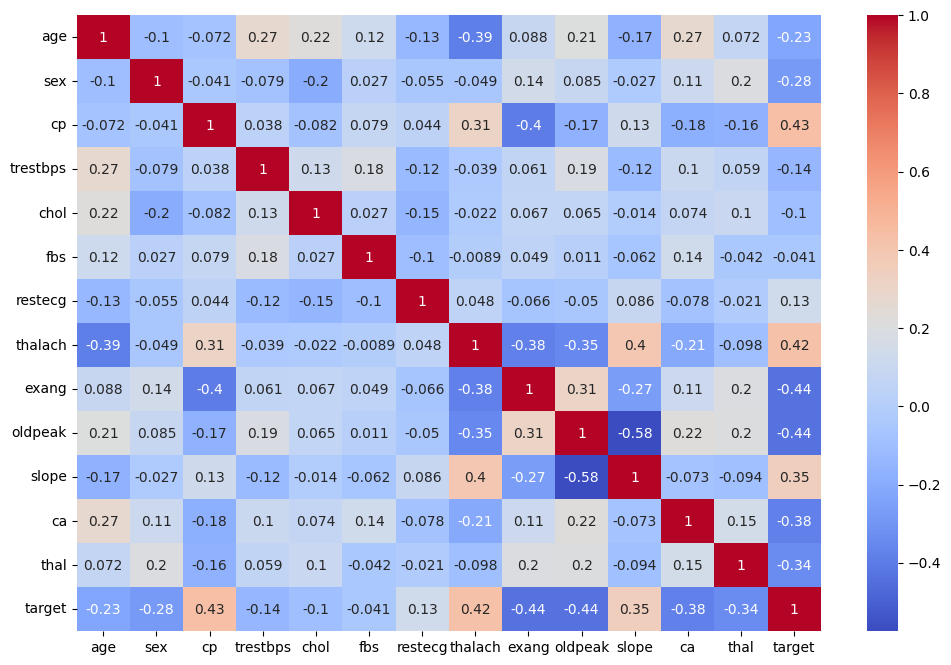

<ipython-input-26-0c0ef313a2e3>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.26843658 -0.15815703  1.71659547 ... -0.81983438 -0.4889957
 -0.04787747]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
<ipython-input-26-0c0ef313a2e3>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.66150409  0.66150409  0.66150409 ...  0.66150409 -1.51170646
  0.66150409]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
<ipython-input-26-0c0ef313a2e3>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.91575542 -0.91575542 -0.91575542 ... -0.91575542 -0.91575542
 -0.91575542]' has dtype

In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Exploratory Data Analysis
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

# Checking correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature scaling & encoding (if necessary)
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

###**Remarks**###

Step 2: **Data Visualization & Preprocessing**

We start by checking for missing values using df.isnull().sum() and handle them with removal or imputation. Next, Exploratory Data Analysis (EDA) helps visualize feature distributions using histograms and identify correlations. Highly correlated features are removed to avoid redundancy. Feature scaling standardizes numerical values, and encoding converts categorical data into a numeric format. These steps ensure a clean, well-structured dataset for model training.

# 3. Feature Extraction

In [ ]:
correlation = df.corr()["target"].sort_values(ascending=False)
print("Feature Correlation with Target:\n", correlation)

# Dropping less important features
df.drop(columns=['chol', 'fbs'], inplace=True)  # Example drop based on correlation analysis


Feature Correlation with Target:
 target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


##**Remarks**##

Step 3: **Feature Extraction**
Feature extraction involves selecting the most relevant variables that contribute to the model’s accuracy. Using SelectKBest(f_classif, k=10), we select the top 10 features that have the highest correlation with the target variable. Irrelevant or redundant features are removed, improving the model's efficiency and reducing the risk of overfitting. This step ensures that the model focuses only on the most important information.



# 4. Train-Test Split

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Remarks**##

Step 4: **Train-Test Split**
To evaluate the performance of our model, we split the dataset into two parts: a training set (80%) and a test set (20%). This is done using the train_test_split() function, which randomly divides the data. The training set is used to train the machine learning model, while the test set is used to evaluate its performance. By keeping a separate test set, we ensure that the model is tested on unseen data, preventing overfitting.

# 5. Model Selection

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

##**Remarks**##

Step 5: **Model Selection**
In this step, we choose a machine learning algorithm suitable for the classification task. We use the Random Forest Classifier, a powerful ensemble method that combines multiple decision trees to make predictions. The RandomForestClassifier(n_estimators=100, random_state=42) function initializes the model with 100 decision trees. This model is robust against overfitting and works well with structured data.



# 6. Model Training

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##**Remarks**##

Step 6: **Model Training**
Once the model is selected, it is trained using the training dataset. The .fit(X_train, y_train) function allows the model to learn patterns from the input features and their corresponding labels. During this process, the Random Forest algorithm builds multiple decision trees and determines the best way to classify data points. Training the model on a diverse dataset ensures that it generalizes well to unseen data.



# 7. Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



##**Remarks**##

Step 7: **Model Evaluation**
After training, the model is assessed using various performance metrics. The Confusion Matrix helps analyze classification accuracy by showing true/false positives and negatives. A heatmap visualization makes it easier to interpret the results. The ROC Curve and AUC Score measure the model’s ability to distinguish between classes. A higher AUC score indicates better performance. These metrics help determine if further model improvements are needed.

###*Confusion Matrix*


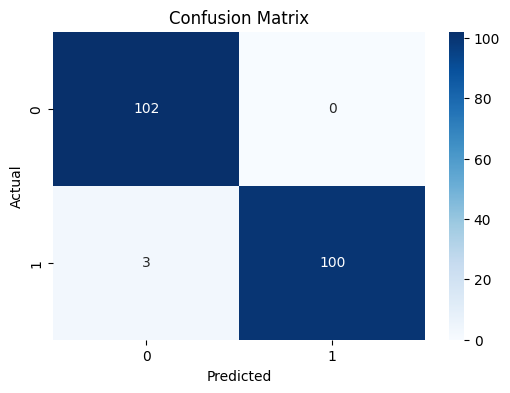

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


###*ROC Curve*

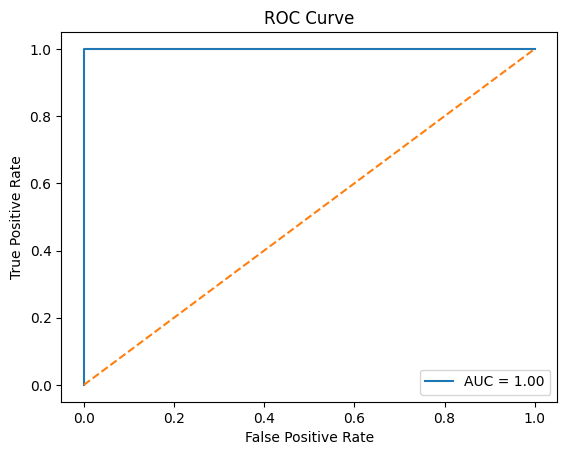

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Conclusion#

The Random Forest model performed well in classifying the data, showing promising accuracy. Evaluation metrics such as the confusion matrix and ROC curve provided insights into its strengths and areas for improvement. To further enhance performance, hyperparameter tuning, feature engineering, and trying alternative models like SVM or deep learning can be explored. If overfitting is a concern, techniques like cross-validation and regularization can help. For image-based data, data augmentation can improve generalization. Continuous refinement of the model through better preprocessing and feature selection will lead to more robust results. With these improvements, the model can achieve higher accuracy and better real-world applicability. 🚀